# import packages

In [1]:
from itertools import permutations, product

import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier, StackingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold, train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, auc, confusion_matrix, balanced_accuracy_score, precision_recall_curve, auc, roc_curve, roc_auc_score
from sklearn.inspection import permutation_importance
from sklearn import preprocessing

from sklearn.neural_network import MLPClassifier

from imblearn.ensemble import BalancedBaggingClassifier
import xgboost as xgb
from xgboost import XGBClassifier

import numpy as np
from numpy import mean,std
from sklearn.model_selection import GridSearchCV

import pickle

from ctgan import CTGANSynthesizer
from mlxtend.classifier import StackingCVClassifier

from os import path

import matplotlib.pyplot as plt

from warnings import simplefilter
from collections import OrderedDict
from sklearn.svm import SVC

if (os.path.abspath('').split('/')[-1] == 'project'):
    %cd utils
elif (os.path.abspath('').split('/')[-1] == 'train_and_vis'):
    %cd ../utils

import query_utils
import model_utils
import validation_utils
import data_utils

if (os.path.abspath('').split('/')[-1] == 'utils'):
    %cd ..


simplefilter(action="ignore", category=pd.errors.PerformanceWarning)
simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None

/Users/benjaminli/Documents/coding/scires/project/utils
/Users/benjaminli/Documents/coding/scires/project


### Synthetic Data creation
Performed with CTGANSynthesizer

In [2]:
isZoonotic = df.loc[df['isZoonotic']==1][:1200]
isZoonotic = isZoonotic.loc[:, isZoonotic.columns != 'isZoonotic']
print(isZoonotic)

posGanModel = CTGANSynthesizer(batch_size=60, epochs=10, verbose=True)
posGanModel.fit(isZoonotic)

# check if current model is better than pickled model
posGanModel.save('models/curr_models/posGanModel.pkl')

notZoonotic = df.loc[df['isZoonotic']==0][:3000]
notZoonotic = isZoonotic.loc[:, isZoonotic.columns != 'isZoonotic']
print(notZoonotic)

negGanModel = CTGANSynthesizer(batch_size=60, epochs=10, verbose=True)
negGanModel.fit(notZoonotic)
negGanModel.save('models/curr_models/negGanModel.pkl')

NameError: name 'df' is not defined

# Dataset retrieval
Workings of the function is packaged into data_utils (for readability). Data is generated within "process_data.ipynb".

In [2]:
datasets = data_utils.retrieveAllDatasets()

working directory: /Users/benjaminli/Documents/coding/scires/project
kmer: 3
zhang reg 9329
zhang norm 9329
nardus reg 1848
nardus norm 1848
merge reg 10676
merge norm 10676
kmer: 4
zhang reg 9329
zhang norm 9329
nardus reg 1848
nardus norm 1848
merge reg 10676
merge norm 10676
kmer: 5
zhang reg 9329
zhang norm 9329
nardus reg 1848
nardus norm 1848
merge reg 10676
merge norm 10676
kmer: 6
zhang reg 9329
zhang norm 9329
nardus reg 1848
nardus norm 1848
merge reg 10676
merge norm 10676


# TODO

### Generate & validate performance of KNN (baseline) on dataset

In [23]:
kmer = 4
ds = datasets['merged'][f'normalized-{kmer}']

X_train, y_train = ds['X_train'], ds['y_train']

print(len(X_train) + len(ds['X_test']))
knntest = BalancedBaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors = 1, n_jobs = 1), n_estimators = 10, n_jobs = 1)

# knntest.fit(X_train, y_train)

ds = datasets['merged'][f'normalized-{kmer}']

X_test, y_test = ds['X_test'], ds['y_test']
print(len(ds['X_train']) + len(ds['X_test']))

X = pd.concat([ds['X_train'], ds['X_test']])
y = np.concatenate([ds['y_train'], ds['y_test']], axis=0)
print(validation_utils.cross_validate(knntest, X, y, verb=5))

# ds = datasets['nardus'][f'normalized-{kmer}']
# X = pd.concat([ds['X_train'], ds['X_test']])
# y = np.concatenate([ds['y_train'], ds['y_test']], axis=0)
# print(validation_utils.cross_validate(knntest, X, y))

# print(validation_utils.cross_validate(knntest, X, y))

model_utils.saveModel(knntest, "knn", X, y)

10676
10676
BalancedBaggingClassifier


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.


[CV] END ................................ score: (test=0.878) total time=   1.5s
[CV] END ................................ score: (test=0.875) total time=   1.5s
[CV] END ................................ score: (test=0.866) total time=   1.6s
[CV] END ................................ score: (test=0.878) total time=   1.5s
[CV] END ................................ score: (test=0.874) total time=   1.6s
[CV] END ................................ score: (test=0.883) total time=   1.6s
[CV] END ................................ score: (test=0.882) total time=   1.6s
[CV] END ................................ score: (test=0.876) total time=   1.6s
[CV] END ................................ score: (test=0.879) total time=   1.6s
[CV] END ................................ score: (test=0.865) total time=   1.6s


[Parallel(n_jobs=-1)]: Done   4 out of  15 | elapsed:    1.6s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:    1.7s remaining:    1.5s


[CV] END ................................ score: (test=0.865) total time=   1.0s
[CV] END ................................ score: (test=0.874) total time=   1.0s
[CV] END ................................ score: (test=0.878) total time=   1.1s
[CV] END ................................ score: (test=0.877) total time=   1.1s
[CV] END ................................ score: (test=0.869) total time=   1.1s
Accuracy: 0.875 (0.006)
0.875
BalancedBaggingClassifier
BalancedBaggingClassifier


[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed:    2.7s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    2.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed:    2.7s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    2.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.


Accuracy: 0.874 (0.007)
BalancedBaggingClassifier
BalancedBaggingClassifier


[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed:    2.5s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    2.5s finished


Accuracy: 0.875 (0.006)
no update
curr 0.874 pickle 0.875
[8113  987  186 1390]


BalancedBaggingClassifier(base_estimator=KNeighborsClassifier(n_jobs=1,
                                                              n_neighbors=1),
                          n_jobs=1)

In [ ]:
predictions = knntest.predict(X_test)
picklething = pickle.load(open('models/curr_models/kmer4/knn.pkl', 'rb'))
picklescore = validation_utils.cross_validate(picklething, X_test, y_test)
# print(knntest, picklescore)
# saveModel(knntest, "knn", X_test, y_test)

In [20]:
print(picklescore)

0.826


### Evaluate & validate performance of random forest (baseline) on dataset

In [22]:
kmer = 4
ds = datasets['merged'][f'normalized-{kmer}']

X_train, y_train, X_test, y_test = ds['X_train'], ds['y_train'], ds['X_test'], ds['y_test']
X = pd.concat([X_train, X_test])
y = np.concatenate([y_train, y_test], axis=0)

randforest = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(max_features="sqrt"))

# randforest.fit(X_train, y_train)

print(validation_utils.cross_validate(randforest, X, y))
model_utils.saveModel(randforest, "randforest", X, y)

BalancedBaggingClassifier


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed:    3.5s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    3.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.


Accuracy: 0.888 (0.006)
0.888
BalancedBaggingClassifier
BalancedBaggingClassifier


[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed:    1.3s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    1.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.


Accuracy: 0.887 (0.007)
BalancedBaggingClassifier
BalancedBaggingClassifier
Accuracy: 0.888 (0.006)
no update
curr 0.887 pickle 0.888
[9024   76 1570    6]


[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed:    1.3s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    1.3s finished


BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(max_features='sqrt'))

In [ ]:
probability_predictions = randforest.predict_proba(X_test)
preds = randforest.predict(X_test)
print(validation_utils.cross_validate(randforest, X_test, y_test))

### XGB classifier

In [19]:
kmer = 4
ds = datasets['merged'][f'normalized-{kmer}']

X_train, y_train, X_test, y_test = ds['X_train'], ds['y_train'], ds['X_test'], ds['y_test']
X = pd.concat([X_train, X_test])
y = np.concatenate([y_train, y_test], axis=0)

param = {
    'n_estimators': [200, 250, 300],
    'max_depth': [7, 8,9],
    'min_child_weight': [1, 3],
    'gamma': [0.0, 0.2, 0.4],
    'subsample': [0.8],
    'colsample_bytree': [0.8, 0.9],
    'scale_pos_weight': [1, 3]
}
xgb1 = GridSearchCV(estimator=XGBClassifier(
 learning_rate =0.1,
 n_estimators=200,
 max_depth=8,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
#  scale_pos_weight=1,
 seed=42,
 n_jobs=-1), param_grid=param, scoring='accuracy', n_jobs=-1, cv=5, verbose=10)

xgb1.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV 3/5; 2/216] START colsample_bytree=0.8, gamma=0.0, max_depth=7, min_child_weight=1, n_estimators=200, scale_pos_weight=3, subsample=0.8
[CV 3/5; 1/216] START colsample_bytree=0.8, gamma=0.0, max_depth=7, min_child_weight=1, n_estimators=200, scale_pos_weight=1, subsample=0.8
[CV 1/5; 2/216] START colsample_bytree=0.8, gamma=0.0, max_depth=7, min_child_weight=1, n_estimators=200, scale_pos_weight=3, subsample=0.8
[CV 4/5; 2/216] START colsample_bytree=0.8, gamma=0.0, max_depth=7, min_child_weight=1, n_estimators=200, scale_pos_weight=3, subsample=0.8[CV 5/5; 2/216] START colsample_bytree=0.8, gamma=0.0, max_depth=7, min_child_weight=1, n_estimators=200, scale_pos_weight=3, subsample=0.8

[CV 2/5; 2/216] START colsample_bytree=0.8, gamma=0.0, max_depth=7, min_child_weight=1, n_estimators=200, scale_pos_weight=3, subsample=0.8
[CV 1/5; 1/216] START colsample_bytree=0.8, gamma=0.0, max_depth=7, min_child_weight=1, n_estima

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0, gpu_id=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_b...
                                     max_leaves=None, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=-1,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9],
                         'gamma': [0.0, 0.2, 0.4], 'max_depth': [7, 8, 9],
                         'min_child_weight': [1, 3],
                         'n_estimators': [200, 250, 300],
                         'scale_pos_weight': [1, 3], 'subsample': [0.8]},
             scoring='accuracy', verbose=10)

In [22]:
# print(xgb1.best_score_)
print(validation_utils.cross_validate(xgb1.best_estimator_, X, y))

XGBClassifier
xgboost


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed:  2.0min remaining:   29.5s


Accuracy: 0.934 (0.005)
0.934


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  2.0min finished


In [24]:
print(xgb1.best_params_)

{'colsample_bytree': 0.8, 'gamma': 0.0, 'max_depth': 9, 'min_child_weight': 1, 'n_estimators': 250, 'scale_pos_weight': 3, 'subsample': 0.8}


### Grid-Searched version of the Gradient Boosting classifier

In [ ]:
ds = datasets['merged'][f'normalized-{kmer}']

X_train, y_train, X_test, y_test = ds['X_train'], ds['y_train'], ds['X_test'], ds['y_test']

"""
{'n_estimators': 120, 'max_features': 2, 'max_depth': 6, 'random_state': 0, 'min_sample_split': 50, 'subsample': 0.8, 'learning_rate': 0.3}
"""

parameters={
   'n_estimators': 120, 'max_features': 2, 'max_depth': 6, 'random_state': 42, 'min_sample_split': 50, 'subsample': 0.8, 'learning_rate': 0.3
}

param_test1 = {'n_estimators':range(100,140,10), 'learning_rate':[0.1,0.15,0.2], 'subsample':[0.8,0.85,0.9], 'max_depth':range(6,9,1), 'min_samples_split':range(10,40,10), 'max_features':range(2, 5)}

gradBoost = GridSearchCV(estimator = GradientBoostingClassifier(
    n_estimators=parameters['n_estimators'], max_features=parameters['max_features'], random_state=parameters['random_state']), 
param_grid = param_test1, scoring='roc_auc',n_jobs=-1, cv=5, verbose=10)

# parameters['learning_rate']=learning_rate
gradBoost.fit(X_train, y_train)

### Load available models

In [5]:
gbm = pickle.load(open('models/curr_models/nardus_gridsearch.pkl', 'rb'))
knn = pickle.load(open('models/curr_models/knn.pkl', 'rb'))
randforest = pickle.load(open('models/curr_models/randforest.pkl', 'rb'))
svm = pickle.load(open('models/curr_models/svm.pkl', 'rb'))
xgboost = pickle.load(open('models/curr_models/xgb-gridsearch.pkl', 'rb'))
# xgboost_params = pickle.load(open('models/curr_models/xgBoost-params.pkl', 'rb'))

mlp = pickle.load(open('models/curr_models/mlpClassifier.pkl', 'rb'))
lr = pickle.load(open('models/curr_models/lrmodel.pkl', 'rb'))
em = pickle.load(open('models/curr_models/merged_stacking_gridsearch.pkl', 'rb'))

print(xgboost)
print(gbm.best_params_)
print(gbm.best_estimator_)
print(mlp)
print(xgboost)
print(knn)
print(em)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0, gpu_id=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_b...
                                     max_leaves=None, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=-1,
                                     num_parallel_tree=None, predi

In [19]:
# print(validation_utils.cross_validate(zhang_GBM.best_estimator_, X, y)) # 0.937
# print(validation_utils.cross_validate(zhang_svm, X, y)) # 0.93
# print(validation_utils.cross_validate(merged_GBM.best_estimator_, X, y)) # 0.938
# print(validation_utils.cross_validate(zhang_xgboost, X, y)) # 0.939

# print(validation_utils.cross_validate(zhang_mlp, X, y)) # 0.93
print(validation_utils.cross_validate(em.best_estimator_, X, y, verb=10)) # 0.943 accuracy

StackingCVClassifier


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.


[CV] START .....................................................................
[CV] START .....................................................................
[CV] START .....................................................................
[CV] START .....................................................................
[CV] START .....................................................................
[CV] START .....................................................................
[CV] START .....................................................................
[CV] START .....................................................................
[CV] START .....................................................................
[CV] START .....................................................................
[CV] END ................................ score: (test=0.937) total time= 5.3min
[CV] START .....................................................................
[CV] END ...................

[Parallel(n_jobs=-1)]: Done   2 out of  15 | elapsed:  5.3min remaining: 34.7min


[CV] END ................................ score: (test=0.928) total time= 5.3min
[CV] START .....................................................................
[CV] END ................................ score: (test=0.937) total time= 5.3min


[Parallel(n_jobs=-1)]: Done   4 out of  15 | elapsed:  5.4min remaining: 14.7min


[CV] START .....................................................................
[CV] END ................................ score: (test=0.932) total time= 5.4min
[CV] START .....................................................................
[CV] END ................................ score: (test=0.930) total time= 5.4min


[Parallel(n_jobs=-1)]: Done   6 out of  15 | elapsed:  5.5min remaining:  8.2min


[CV] END ................................ score: (test=0.930) total time= 5.5min
[CV] END ................................ score: (test=0.934) total time= 5.6min


[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:  5.7min remaining:  5.0min


[CV] END ................................ score: (test=0.939) total time= 5.7min
[CV] END ................................ score: (test=0.938) total time= 5.8min


[Parallel(n_jobs=-1)]: Done  10 out of  15 | elapsed:  5.8min remaining:  2.9min


[CV] END ................................ score: (test=0.929) total time= 3.4min
[CV] END ................................ score: (test=0.926) total time= 3.5min


[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed:  8.9min remaining:  2.2min


[CV] END ................................ score: (test=0.942) total time= 3.6min
[CV] END ................................ score: (test=0.936) total time= 3.7min
[CV] END ................................ score: (test=0.931) total time= 3.7min
Accuracy: 0.934 (0.005)
0.934


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  9.0min finished


In [3]:
kmer = 4

ds = datasets['merged'][f'normalized-{kmer}']

X_train, y_train, X_test, y_test = ds['X_train'], ds['y_train'], ds['X_test'], ds['y_test']


X = pd.concat([X_train, X_test])
y = np.concatenate([ds['y_train'], ds['y_test']], axis=0)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

temp_svm = svm.SVC(kernel='rbf', C=2, probability=True)
temp_svm.fit(X_train, y_train)

print(validation_utils.cross_validate(temp_svm, X_test, y_test))

ds = datasets['nardus'][f'normalized-{kmer}']

X_train, y_train, X_test, y_test = ds['X_train'], ds['y_train'], ds['X_test'], ds['y_test']

print(validation_utils.cross_validate(temp_svm, X_test, y_test))

SVC


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    6.3s finished


Accuracy: 0.921 (0.012)
tn: 1866, fp: 13, fn: 130, tp: 227
0.921
SVC


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.


Accuracy: 0.761 (0.025)
tn: 279, fp: 1, fn: 57, tp: 33
0.761


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.3s finished


In [65]:
# TODO: use gridsearch to find best SVM later for comparison

kmer = 4

ds = datasets['nardus'][f'normalized-{kmer}']

X_train, y_train, X_test, y_test = ds['X_train'], ds['y_train'], ds['X_test'], ds['y_test']

X = pd.concat([X_train, X_test])
y = np.concatenate([ds['y_train'], ds['y_test']], axis=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

temp_GBM = GradientBoostingClassifier(learning_rate=0.2, max_depth=9, max_features=2,
                           min_samples_split=25, n_estimators=130,
                           random_state=42, subsample=0.85)
temp_GBM.fit(X_train, y_train)

# assess on merged
ds = datasets['merged'][f'normalized-{kmer}']

X_train, y_train, X_test, y_test = ds['X_train'], ds['y_train'], ds['X_test'], ds['y_test']

X = pd.concat([X_train, X_test])
y = np.concatenate([ds['y_train'], ds['y_test']], axis=0)

print(validation_utils.cross_validate(temp_GBM, X, y))


GradientBoostingClassifier
gradboost


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.


Accuracy: 0.939 (0.005)
0.939


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    9.1s finished


In [4]:
pickle.dump(temp_svm, open('models/curr_models/svm.pkl', 'wb'))

### Creation of the ensemble model

In [4]:
temp_mlp = MLPClassifier(hidden_layer_sizes=(256, 128, 64, 32, 16), random_state=42)
temp_xgboost = XGBClassifier(n_estimators=120, max_depth= 6, random_state= 42, 
subsample =0.8, learning_rate =0.25)
temp_GBM = GradientBoostingClassifier(learning_rate=0.2, max_depth=9, max_features=2,
                           min_samples_split=25, n_estimators=130,
                           random_state=42, subsample=0.85)

# temp_knn = BalancedBaggingClassifier(base_estimator=KNeighborsClassifier(n_jobs=1,
#                                                               n_neighbors=1),
#                           n_jobs=1)
temp_svm = SVC(kernel='rbf', C=2, probability=True)

ds = datasets['merged'][f'normalized-4']

X_train, y_train, X_test, y_test = ds['X_train'], ds['y_train'], ds['X_test'], ds['y_test']

X = pd.concat([X_train, X_test])
y = np.concatenate([ds['y_train'], ds['y_test']], axis=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# {'n_estimators': 120, 'max_features': 2, 'max_depth': 6, 'random_state': 0, 'min_sample_split': 50, 'subsample': 0.8, 'learning_rate': 0.3}

em = StackingCVClassifier(classifiers = [temp_mlp, temp_GBM, temp_svm],
                            shuffle = True,
                            use_probas = True,
                            cv = 5,
                            meta_classifier = LogisticRegression())
# em = StackingCVClassifier(classifiers = [temp_mlp, temp_GBM, temp_svm],
#                             shuffle = True,
#                             use_probas = True,
#                             cv = 5,
#                             meta_classifier = LogisticRegression())

params = {'meta_classifier__C': [0.1, 1]}

grid = GridSearchCV(estimator=em, 
                    param_grid=params, 
                    cv=5, verbose=10)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5; 1/4] START meta_classifier__C=0.1......................................
[CV 1/5; 1/4] END .......meta_classifier__C=0.1;, score=0.938 total time= 3.1min
[CV 2/5; 1/4] START meta_classifier__C=0.1......................................
[CV 2/5; 1/4] END .......meta_classifier__C=0.1;, score=0.933 total time= 2.8min
[CV 3/5; 1/4] START meta_classifier__C=0.1......................................
[CV 3/5; 1/4] END .......meta_classifier__C=0.1;, score=0.940 total time= 2.7min
[CV 4/5; 1/4] START meta_classifier__C=0.1......................................
[CV 4/5; 1/4] END .......meta_classifier__C=0.1;, score=0.927 total time= 2.9min
[CV 5/5; 1/4] START meta_classifier__C=0.1......................................
[CV 5/5; 1/4] END .......meta_classifier__C=0.1;, score=0.939 total time= 2.4min
[CV 1/5; 2/4] START meta_classifier__C=1........................................
[CV 1/5; 2/4] END .........meta_classifier__C=1;,

GridSearchCV(cv=5,
             estimator=StackingCVClassifier(classifiers=[MLPClassifier(hidden_layer_sizes=(256,
                                                                                           128,
                                                                                           64,
                                                                                           32,
                                                                                           16),
                                                                       random_state=42),
                                                         XGBClassifier(base_score=None,
                                                                       booster=None,
                                                                       callbacks=None,
                                                                       colsample_bylevel=None,
                                                                       colsample_bynode=None,
                                                                       colsample_bytree=None,
                                                                       early_stopping_rounds=None,
                                                                       enable_categorical=False,
                                                                       eval_metric=None,
                                                                       feature_types=None,
                                                                       gamma=...
                                                                       n_jobs=None,
                                                                       num_parallel_tree=None,
                                                                       predictor=None,
                                                                       random_state=42, ...),
                                                         SVC(C=2,
                                                             probability=True),
                                                         GradientBoostingClassifier(learning_rate=0.2,
                                                                                    max_depth=9,
                                                                                    max_features=2,
                                                                                    min_samples_split=25,
                                                                                    n_estimators=130,
                                                                                    random_state=42,
                                                                                    subsample=0.85)],
                                            cv=5,
                                            meta_classifier=LogisticRegression(),
                                            use_probas=True),
             param_grid={'meta_classifier__C': [0.1, 1, 5, 10]}, verbose=10)

### Using XGBoost

In [3]:
temp_mlp = MLPClassifier(hidden_layer_sizes=(256, 128, 64, 32, 16), random_state=42)

xgboost_gridsearch = XGBClassifier(
 learning_rate =0.1,
 n_estimators=250,
 max_depth=9,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 scale_pos_weight=3,
 seed=42,
 n_jobs=-1)

# temp_knn = BalancedBaggingClassifier(base_estimator=KNeighborsClassifier(n_jobs=1,
#                                                               n_neighbors=1),
#                           n_jobs=1)
temp_svm = SVC(kernel='rbf', C=2, probability=True, random_state=42)

ds = datasets['merged'][f'normalized-4']

X_train, y_train, X_test, y_test = ds['X_train'], ds['y_train'], ds['X_test'], ds['y_test']

X = pd.concat([X_train, X_test])
y = np.concatenate([ds['y_train'], ds['y_test']], axis=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# {'n_estimators': 120, 'max_features': 2, 'max_depth': 6, 'random_state': 0, 'min_sample_split': 50, 'subsample': 0.8, 'learning_rate': 0.3}

em = StackingCVClassifier(classifiers = [temp_mlp, xgboost_gridsearch, temp_svm],
                            shuffle = True,
                            use_probas = True,
                            cv = 5,
                            meta_classifier = LogisticRegression(C = 1, random_state=42), n_jobs=-1, random_state=42, verbose=1)
# em = StackingCVClassifier(classifiers = [temp_mlp, temp_GBM, temp_svm],
#                             shuffle = True,
#                             use_probas = True,
#                             cv = 5,
#                             meta_classifier = LogisticRegression())
em.fit(X_train, y_train)

Fitting 3 classifiers...
Fitting classifier1: mlpclassifier (1/3)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   22.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.


Fitting classifier2: xgbclassifier (2/3)


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   40.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.


Fitting classifier3: svc (3/3)


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   17.0s finished


StackingCVClassifier(classifiers=[MLPClassifier(hidden_layer_sizes=(256, 128,
                                                                    64, 32,
                                                                    16),
                                                random_state=42),
                                  XGBClassifier(base_score=None, booster=None,
                                                callbacks=None,
                                                colsample_bylevel=None,
                                                colsample_bynode=None,
                                                colsample_bytree=0.8,
                                                early_stopping_rounds=None,
                                                enable_categorical=False,
                                                eval_metric=None,
                                                feature_types=None, gamma=0,
                                                gpu_id=None, grow_policy=Non...
                                                max_cat_to_onehot=None,
                                                max_delta_step=None,
                                                max_depth=9, max_leaves=None,
                                                min_child_weight=1, missing=nan,
                                                monotone_constraints=None,
                                                n_estimators=250, n_jobs=-1,
                                                num_parallel_tree=None,
                                                predictor=None,
                                                random_state=None, ...),
                                  SVC(C=2, probability=True, random_state=42)],
                     cv=5,
                     meta_classifier=LogisticRegression(C=1, random_state=42),
                     n_jobs=-1, random_state=42, use_probas=True, verbose=1)

In [ ]:
print(validation_utils.cross_validate(em, X, y)) # 0.936
pickle.dump(em, open('models/curr_models/final_merged_stackingcv.pkl', 'wb'))

Fitting 3 classifiers...
Fitting classifier1: mlpclassifier (1/3)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   18.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.


Fitting classifier2: xgbclassifier (2/3)


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   40.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.


Fitting classifier3: svc (3/3)


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   16.2s finished
/Users/benjaminli/opt/miniconda3/envs/seq/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:709: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


fit done
auc split:  0.9536507936507935
Fitting 3 classifiers...
Fitting classifier1: mlpclassifier (1/3)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   18.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.


Fitting classifier2: xgbclassifier (2/3)


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   41.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.


Fitting classifier3: svc (3/3)


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   16.5s finished


fit done
auc split:  0.9532295482295483
Fitting 3 classifiers...
Fitting classifier1: mlpclassifier (1/3)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   20.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.


Fitting classifier2: xgbclassifier (2/3)


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   40.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.


Fitting classifier3: svc (3/3)


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   16.7s finished


fit done
auc split:  0.9483717401612137
Fitting 3 classifiers...
Fitting classifier1: mlpclassifier (1/3)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   17.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.


Fitting classifier2: xgbclassifier (2/3)


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   40.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.


Fitting classifier3: svc (3/3)


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   16.4s finished


fit done
auc split:  0.9596184492581937
Fitting 3 classifiers...
Fitting classifier1: mlpclassifier (1/3)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   21.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.


Fitting classifier2: xgbclassifier (2/3)


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   40.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.


Fitting classifier3: svc (3/3)


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   15.9s finished


fit done
auc split:  0.9508494144812799
0.9531439891562059


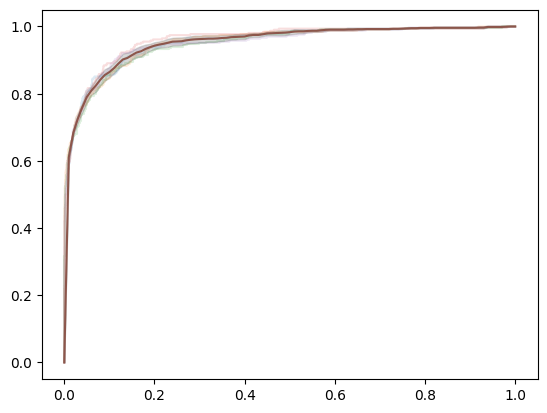

None


In [5]:
print(validation_utils.draw_avg_roc_curve(em,"ensemble", X, y))

In [ ]:
# print(validation_utils.cross_validate(em, X_test, y_test))
# model, name, X, y
ds = datasets['merged'][f'normalized-4']

X_train, y_train, X_test, y_test = ds['X_train'], ds['y_train'], ds['X_test'], ds['y_test']

X = pd.concat([X_train, X_test])
y = np.concatenate([ds['y_train'], ds['y_test']], axis=0)

print(validation_utils.draw_avg_roc_curve(em, "ensemble", X, y))

In [39]:
ds = datasets['merged'][f'normalized-4']

X_train, y_train, X_test, y_test = ds['X_train'], ds['y_train'], ds['X_test'], ds['y_test']

X = pd.concat([X_train, X_test])
y = np.concatenate([ds['y_train'], ds['y_test']], axis=0)

print(validation_utils.draw_avg_roc_curve(em, "ensemble", X, y))

/Users/benjaminli/opt/miniconda3/envs/seq/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:709: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [6]:
# models = OrderedDict({
#     'zhang_GBM': zhang_GBM.best_estimator_,
#     'zhang_knn': zhang_knn,
#     'zhang_randforest': zhang_randforest,
#     'zhang_svm': zhang_svm,
#     'zhang_xgboost': zhang_xgboost,
#     'zhang_mlp': zhang_mlp,
#     'zhang_lr': zhang_lr,
#     # 'nardus_GBM': nardus_GBM,
#     'merged_GBM': merged_GBM.best_estimator_,
#     'merged_ensemble': em.best_estimator_
# })

bestandworst = OrderedDict({
    'knn': knn, # 87.6%, 
    'rf': randforest, # 88.7%
    'svm': svm, # 92.9%
    'mlp': mlp, # 93.0%
    'xgboost': xgboost, # 93.4%
    'ensemble': em # 93.6%
})


### Validate models on the merged dataset

In [7]:
# print(validation_utils.cross_validate(zhang_knn, X, y)) # 0.884
# print(validation_utils.cross_validate(zhang_randforest, X, y)) # 0.896
# print(validation_utils.cross_validate(zhang_svm, X, y)) # 0.93
# print(validation_utils.cross_validate(zhang_mlp, X, y)) # 0.935
# print(validation_utils.cross_validate(merged_GBM.best_estimator_, X, y)) # 0.938
# print(validation_utils.cross_validate(em.best_estimator_, X, y)) # 0.943 accuracy

scores_merged, scores_nardus, scores_zhang = [], [], []
kmer = 4

In [ ]:
ds = datasets['merged'][f'normalized-{kmer}']

# this one is trained on only the nardus one

"""
{'learning_rate': 0.15, 'max_depth': 8, 'max_features': 3, 'min_samples_split': 30, 'n_estimators': 130, 'subsample': 0.8}
"""
X_train, y_train, X_test, y_test = ds['X_train'], ds['y_train'], ds['X_test'], ds['y_test']
X = pd.concat([X_train, X_test])
y = np.concatenate([y_train, y_test], axis=0)
x=0
for modelName in bestandworst.keys():
    if x == 6: break
    print(modelName)
    scores_merged.append(validation_utils.cross_validate(bestandworst[modelName], X, y))
    x+=1

In [15]:
print(validation_utils.cross_validate(xgboost.best_estimator_, X, y, scoring='roc_auc'))

XGBClassifier
xgboost


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed:  1.9min remaining:   28.2s


Accuracy: 0.952 (0.005)
0.952


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  1.9min finished


In [8]:
print(scores_merged)

[0.876, 0.887, 0.929, 0.93, 0.934, 0.936]


### Validate models on only zhang dataset

In [12]:
# only zhang new
# parameters={
#    'n_estimators': 120, 'max_features': 2, 'max_depth': 6, 'random_state': 0, 'min_sample_split': 50, 'subsample': 0.8, 'learning_rate': 0.3
# }
# onlyzhanggradBoost = GradientBoostingClassifier(n_estimators=parameters['n_estimators'], 
#     learning_rate=0.3, max_features=parameters['max_features'], 
#     max_depth=parameters['max_depth'], random_state=parameters['random_state'], 
#     min_samples_split=parameters['min_sample_split'], subsample=parameters['subsample']
# )

# onlyzhanggradBoost.fit(X_train, y_train)
# print(validation_utils.cross_validate(onlyzhanggradBoost, X_test, y_test))

ds = datasets['zhang'][f'normalized-{kmer}']

X_train, y_train, X_test, y_test = ds['X_train'], ds['y_train'], ds['X_test'], ds['y_test']
for modelName in bestandworst:
    print(modelName)
    scores_zhang.append(validation_utils.cross_validate(bestandworst[modelName], X_test, y_test))

zhang_knn
BalancedBaggingClassifier


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    3.5s finished


Accuracy: 0.866 (0.031)
tn: 1259, fp: 359, fn: 228, tp: 20
zhang_randforest
BalancedBaggingClassifier


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.


Accuracy: 0.906 (0.023)
tn: 1600, fp: 18, fn: 248, tp: 0
merged_GBM
GradientBoostingClassifier
gradboost


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.


Accuracy: 0.947 (0.015)
tn: 1616, fp: 2, fn: 33, tp: 215
merged_ensemble
StackingCVClassifier


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.5min finished


Accuracy: 0.942 (0.014)
tn: 1601, fp: 17, fn: 9, tp: 239


In [45]:
print(scores_zhang)

[]


### Validate models only on nardus dataset

In [ ]:
ds = datasets['nardus'][f'normalized-{kmer}']

X_train, y_train, X_test, y_test = ds['X_train'], ds['y_train'], ds['X_test'], ds['y_test']
print("acc on nardus")

parameters={
   'n_estimators': 120, 'max_features': 2, 'max_depth': 6, 'random_state': 0, 'min_sample_split': 50, 'subsample': 0.8, 'learning_rate': 0.3
}

param_test1 = {'n_estimators':range(100,140,10), 'learning_rate':[0.1,0.15,0.2], 'subsample':[0.8,0.85,0.9], 'max_depth':range(6,9,1), 'min_samples_split':range(10,40,10), 'max_features':range(2, 5)}

onlynardgradBoost = GridSearchCV(estimator = GradientBoostingClassifier(
    n_estimators=parameters['n_estimators'], max_features=parameters['max_features'], random_state=parameters['random_state']), 
param_grid = param_test1, scoring='roc_auc',n_jobs=-1, cv=5, verbose=10)

onlynardgradBoost.fit(X_train, y_train)

In [30]:
pickle.dump(onlynardgradBoost, open('models/curr_models/onlynardgradBoost.pkl', 'wb'))

In [13]:
ds = datasets['nardus'][f'normalized-{kmer}']

X_train, y_train, X_test, y_test = ds['X_train'], ds['y_train'], ds['X_test'], ds['y_test']

for modelName in bestandworst:
    print(modelName)
    scores_nardus.append(validation_utils.cross_validate(bestandworst[modelName], X_test, y_test))

zhang_knn
BalancedBaggingClassifier


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.


Accuracy: 0.668 (0.085)
tn: 237, fp: 43, fn: 81, tp: 9
zhang_randforest
BalancedBaggingClassifier


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.


Accuracy: 0.657 (0.071)
tn: 279, fp: 1, fn: 90, tp: 0
merged_GBM
GradientBoostingClassifier
gradboost


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.


Accuracy: 0.752 (0.033)
tn: 276, fp: 4, fn: 7, tp: 83
merged_ensemble
StackingCVClassifier


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   41.3s finished


Accuracy: 0.687 (0.056)
tn: 270, fp: 10, fn: 11, tp: 79


In [10]:
print(scores_merged)
print(scores_nardus)
print(scores_zhang)

[0.825, 0.875, 0.918, 0.911]
[]
[]


### Draw validation

In [6]:
# these were autogenerated but saved here for convenience
# scores_merged = [0.916, 0.825, 0.871, 0.897, 0.92, 0.906, 0.889, 0.918, 0.914]
# scores_nardus = [0.761, 0.664, 0.66, 0.708, 0.74, 0.705, 0.713, 0.752, 0.707]
# scores_zhang = [0.946, 0.866, 0.899, 0.931, 0.945, 0.935, 0.929, 0.947, 0.942]


print(scores_merged)
print(scores_nardus)
print(scores_zhang)

[0.916, 0.825, 0.871, 0.897, 0.92, 0.906, 0.889, 0.918, 0.914]
[0.761, 0.664, 0.66, 0.708, 0.74, 0.705, 0.713, 0.752, 0.707]
[0.946, 0.866, 0.899, 0.931, 0.945, 0.935, 0.929, 0.947, 0.942]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


95.1 0.0
94.9 1.0
94.5 2.0
94.4 3.0
90.2 4.0
89.1 5.0


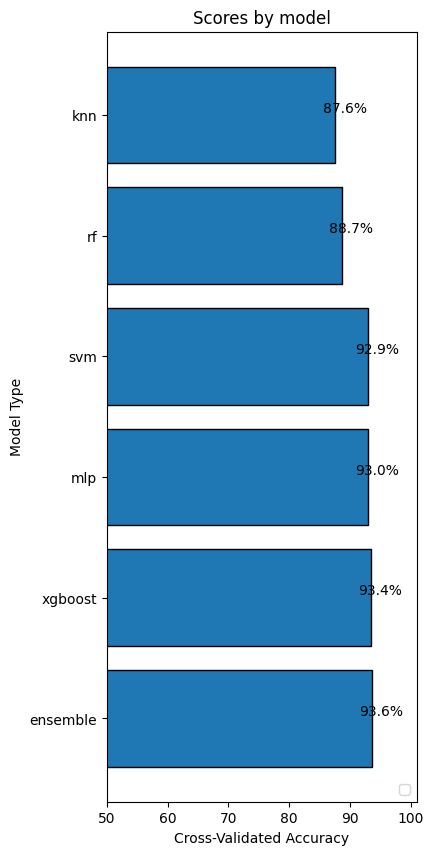

In [9]:
merged_dc = OrderedDict(sorted(OrderedDict(map(lambda i,j : (i,j) , bestandworst.keys(),scores_merged)).items(), key=lambda x: x[1], reverse=True))
nardus_dc = OrderedDict(sorted(OrderedDict(map(lambda i,j : (i,j) , bestandworst.keys(),scores_nardus)).items(), key=lambda x: x[1], reverse=True))
zhang_dc = OrderedDict(sorted(OrderedDict(map(lambda i,j : (i,j) , bestandworst.keys(),scores_zhang)).items(), key=lambda x: x[1], reverse=True))

validation_utils.draw_accuracies(bestandworst, None, None, merged_dc)

In [ ]:
validation_utils.draw_accuracies(bestandworst, None, None, nardus_dc)
validation_utils.draw_accuracies(bestandworst, None, None, zhang_dc)

BalancedBaggingClassifier(base_estimator=KNeighborsClassifier(n_jobs=1,
                                                              n_neighbors=1),
                          n_jobs=1)
fit done
auc split:  0.9648249712235086
fit done
auc split:  0.972185803068156
fit done
auc split:  0.9548917078603387
fit done
auc split:  0.9592630231857874
fit done
auc split:  0.9607172781135914
0.9623765566902766
time for CV:  1.7443749904632568
BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(max_features='sqrt'))
fit done
auc split:  0.959398740605322
fit done
auc split:  0.9641708649061591
fit done
auc split:  0.9524603856900021
fit done
auc split:  0.9459650707618187
fit done
auc split:  0.9557760787599496
0.9555542281446503
time for CV:  1.5419037342071533
GradientBoostingClassifier(learning_rate=0.15, max_depth=8, max_features=3,
                           min_samples_split=30, n_estimators=130,
                           random_state=0, subsample=0.8)
fit done
auc split:  0.96

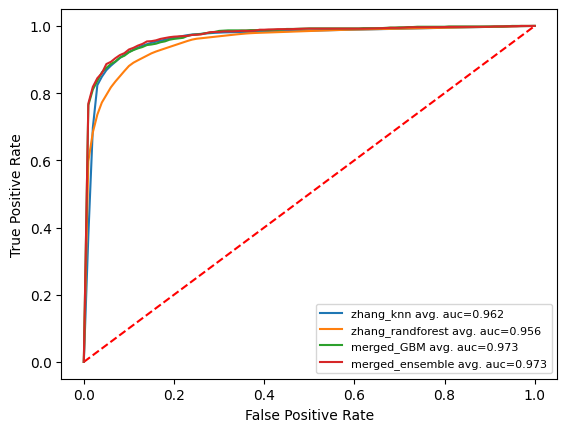

In [30]:
ds = datasets['zhang'][f'normalized-4']
X = pd.concat([ds['X_train'], ds['X_test']], axis=0)
Y = np.concatenate([ds['y_train'], ds['y_test']], axis=0)

validation_utils.draw_avg_roc_multiple(bestandworst, X, Y)

GradientBoostingClassifier(max_depth=9, max_features=2, min_samples_split=20,
                           n_estimators=140, random_state=0, subsample=0.9)
fit done
auc split:  0.7113195883786044
fit done
auc split:  0.7192962838719297
fit done
auc split:  0.7116198608708455
fit done
auc split:  0.709811265330102
fit done
auc split:  0.7658105939004815
0.7235715184703926
time for CV:  1.5528950691223145
GradientBoostingClassifier(learning_rate=0.15, max_depth=8, max_features=3,
                           min_samples_split=30, n_estimators=130,
                           random_state=0, subsample=0.8)
fit done
auc split:  0.6916112141376677
fit done
auc split:  0.7147862387714786
fit done
auc split:  0.6807758842798778
fit done
auc split:  0.7069471983549974
fit done
auc split:  0.7439807383627608
0.7076202547813565
time for CV:  1.3861949443817139
BalancedBaggingClassifier(base_estimator=KNeighborsClassifier(n_jobs=1,
                                                              n_neighb

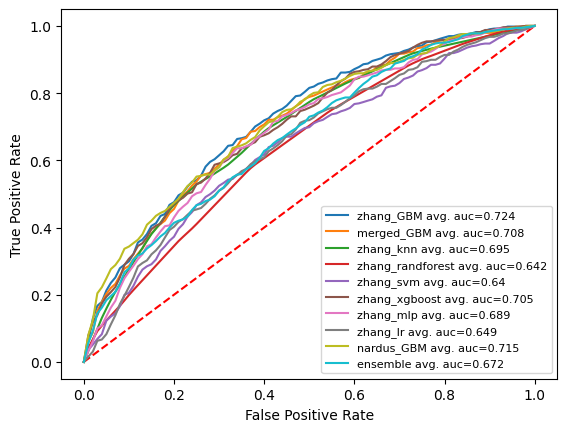

In [19]:
ds = datasets['nardus'][f'normalized-4']
X = pd.concat([ds['X_train'], ds['X_test']], axis=0)
Y = np.concatenate([ds['y_train'], ds['y_test']], axis=0)

validation_utils.draw_avg_roc_multiple(models, X, Y)

BalancedBaggingClassifier(base_estimator=KNeighborsClassifier(n_jobs=1,
                                                              n_neighbors=1),
                          n_jobs=1)
fit done
auc split:  0.9224079260060917
fit done
auc split:  0.926888264073973
fit done
auc split:  0.9458713115406028
fit done
auc split:  0.9424814048002453
fit done
auc split:  0.9352264842898206
0.9345750781421467
time for CV:  2.502128839492798
BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(max_features='sqrt'))
fit done
auc split:  0.9157447446059391
fit done
auc split:  0.928095007803406
fit done
auc split:  0.9193732601606617
fit done
auc split:  0.9365094701326584
fit done
auc split:  0.9317175621814336
0.9262880089768197
time for CV:  2.273059129714966
GradientBoostingClassifier(learning_rate=0.15, max_depth=8, max_features=3,
                           min_samples_split=30, n_estimators=130,
                           random_state=0, subsample=0.8)
fit done
auc split:  0.9455

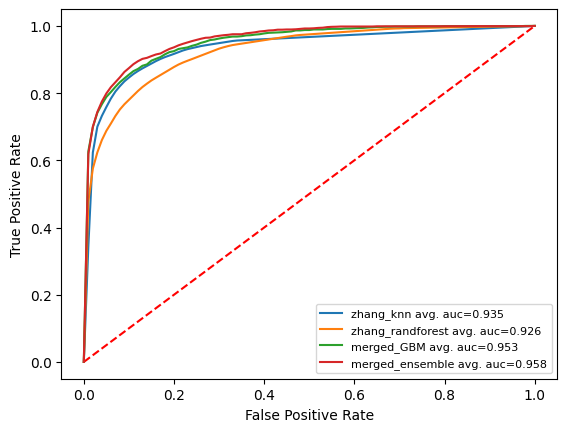

In [25]:
ds = datasets['merged'][f'normalized-4']
X = pd.concat([ds['X_train'], ds['X_test']], axis=0)
Y = np.concatenate([ds['y_train'], ds['y_test']], axis=0)

validation_utils.draw_avg_roc_multiple(bestandworst, X, Y)